# Pandas

Pandas is one of the most popular Python libraries for Data Science and Analytics. It is designed to process/query/analyze structured data: such as CSV, JSON, and database.

https://pandas.pydata.org/

In [97]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

## Core components of Pandas
- **Series**: a sequence of data, a column (1D)
- **DataFrame**: a table (2D)

In [2]:
data = pd.Series(["Tom", "John", "Alice"])

In [3]:
data

0      Tom
1     John
2    Alice
dtype: object

In [4]:
data.values

array(['Tom', 'John', 'Alice'], dtype=object)

In [5]:
data.index

RangeIndex(start=0, stop=3, step=1)

In [6]:
data = pd.Series([25, 30, 21],name='Ages', index=['Tom', 'John', 'Alice'])

In [7]:
data  # Series is also a dictionary

Tom      25
John     30
Alice    21
Name: Ages, dtype: int64

In [8]:
data.index

Index(['Tom', 'John', 'Alice'], dtype='object')

In [9]:
data['Tom']

25

In [10]:
people_dict = {"Tom":25,
              "John":30,
              "Alice":21}

In [11]:
data = pd.Series(people_dict)

In [12]:
data

Tom      25
John     30
Alice    21
dtype: int64

In [13]:
df = pd.DataFrame({
    "Name":["Tom","John","Alice"],
    "Age": [25, 30, 21],
    "Sex": ["male","male","female"]
})

In [14]:
df

,Name,Age,Sex
0,Tom,25,male
1,John,30,male
2,Alice,21,female


## Save a dataframe into a cvs file

In [15]:
df.to_csv("Data/people.csv")

In [16]:
state_population = {"CA":38000000, "TX":26000000, "NY":19000000}
state_area = {"CA":423000, "TX":695000, "NY":141000}

In [17]:
states = pd.DataFrame({'Population': state_population,
                     'Area': state_area})

In [18]:
states

,Population,Area
CA,38000000,423000
TX,26000000,695000
NY,19000000,141000


In [19]:
states["Population"]['CA']

38000000

In [20]:
states["Population"]['TX']

26000000

In [21]:
pd.DataFrame(np.random.rand(3,2),columns=['foo','bar'],index=['a','b','c'])

,foo,bar
a,0.815610,0.325779
b,0.835504,0.892427
c,0.264137,0.395890


In [22]:
states.index

Index(['CA', 'TX', 'NY'], dtype='object')

In [23]:
states.columns

Index(['Population', 'Area'], dtype='object')

In [24]:
states.keys()

Index(['Population', 'Area'], dtype='object')

In [25]:
states['Population']

CA    38000000
TX    26000000
NY    19000000
Name: Population, dtype: int64

In [26]:
states['Population'][0:2]

CA    38000000
TX    26000000
Name: Population, dtype: int64

In [27]:
states.Population.CA

38000000

## Calculate the people density for each state

In [28]:
states["Population"]['CA']/states["Area"]['CA']

89.83451536643027

In [29]:
states["Population"]['TX']/states["Area"]['TX']

37.410071942446045

In [30]:
states['Density'] = states['Population'] / states['Area']

In [31]:
states

,Population,Area,Density
CA,38000000,423000,89.834515
TX,26000000,695000,37.410072
NY,19000000,141000,134.751773


## Convert Pandas dataframe into Numpy arrays by using values

In [32]:
v_states=states.values
v_states

array([[3.80000000e+07, 4.23000000e+05, 8.98345154e+01],
       [2.60000000e+07, 6.95000000e+05, 3.74100719e+01],
       [1.90000000e+07, 1.41000000e+05, 1.34751773e+02]])

In [33]:
v_states[:,0].sum()/v_states[:,1].sum()

65.9253375694996

In [34]:
v_states.T

array([[3.80000000e+07, 2.60000000e+07, 1.90000000e+07],
       [4.23000000e+05, 6.95000000e+05, 1.41000000e+05],
       [8.98345154e+01, 3.74100719e+01, 1.34751773e+02]])

## access a certain value of the dataframe using iloc or loc

In [35]:
states.iloc[1:3,:2]

,Population,Area
TX,26000000,695000
NY,19000000,141000


In [36]:
states.loc[:'TX','Population':'Area']

,Population,Area
CA,38000000,423000
TX,26000000,695000


In [37]:
#mask your table: only select data that meets the threshold.
states[states.Population>20000000]

,Population,Area,Density
CA,38000000,423000,89.834515
TX,26000000,695000,37.410072


In [38]:
new_state=pd.Series([172000,1000],name='AK',index=['Population','Area'])
#new_state={'Population':2000}

In [39]:
states=states.append(new_state)

In [40]:
states=states.drop(states.columns[[3,4]], axis=1)

IndexError: index 3 is out of bounds for axis 0 with size 3

In [41]:
states

,Population,Area,Density
CA,38000000.0,423000.0,89.834515
TX,26000000.0,695000.0,37.410072
NY,19000000.0,141000.0,134.751773
AK,172000.0,1000.0,NaN


In [44]:
states.isnull().any()

Population    False
Area          False
Density        True
dtype: bool

In [45]:
states.fillna(0)

,Population,Area,Density
CA,38000000.0,423000.0,89.834515
TX,26000000.0,695000.0,37.410072
NY,19000000.0,141000.0,134.751773
AK,172000.0,1000.0,0.000000


In [46]:
states['Density']['AK']=states['Population']['AK']/states['Area']['AK']

In [47]:
states

,Population,Area,Density
CA,38000000.0,423000.0,89.834515
TX,26000000.0,695000.0,37.410072
NY,19000000.0,141000.0,134.751773
AK,172000.0,1000.0,172.000000


## Load a cvs file to a dataframe

In [48]:
df = pd.read_csv("Data/people.csv", index_col=0)

In [49]:
df

,Name,Age,Sex
0,Tom,25,male
1,John,30,male
2,Alice,21,female


In [50]:
pop = pd.read_csv("Data/state-population.csv")
areas = pd.read_csv("Data/state-areas.csv")
abbrevs = pd.read_csv("Data/state-abbrevs.csv")

In [51]:
abbrevs.head()

,state,abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [52]:
pop.isnull().any()

state/region    False
ages            False
year            False
population       True
dtype: bool

In [53]:
#pop.fillna(0)
pop.dropna(inplace=True)

In [54]:
pop.isnull().any()

state/region    False
ages            False
year            False
population      False
dtype: bool

In [55]:
pop

,state/region,ages,year,population
0,AL,under18,2012,1117489.0
1,AL,total,2012,4817528.0
2,AL,under18,2010,1130966.0
3,AL,total,2010,4785570.0
4,AL,under18,2011,1125763.0
...,...,...,...,...
2539,USA,total,2010,309326295.0
2540,USA,under18,2011,73902222.0
2541,USA,total,2011,311582564.0
2542,USA,under18,2012,73708179.0


In [56]:
merged = pd.merge(pop, abbrevs, left_on='state/region', right_on='abbreviation')

In [57]:
merged

,state/region,ages,year,population,state,abbreviation
0,AL,under18,2012,1117489.0,Alabama,AL
1,AL,total,2012,4817528.0,Alabama,AL
2,AL,under18,2010,1130966.0,Alabama,AL
3,AL,total,2010,4785570.0,Alabama,AL
4,AL,under18,2011,1125763.0,Alabama,AL
...,...,...,...,...,...,...
2443,WY,under18,1993,137458.0,Wyoming,WY
2444,WY,total,1991,459260.0,Wyoming,WY
2445,WY,under18,1991,136720.0,Wyoming,WY
2446,WY,under18,1990,136078.0,Wyoming,WY


In [58]:
merged = merged.drop('state/region',1)

In [59]:
merged

,ages,year,population,state,abbreviation
0,under18,2012,1117489.0,Alabama,AL
1,total,2012,4817528.0,Alabama,AL
2,under18,2010,1130966.0,Alabama,AL
3,total,2010,4785570.0,Alabama,AL
4,under18,2011,1125763.0,Alabama,AL
...,...,...,...,...,...
2443,under18,1993,137458.0,Wyoming,WY
2444,total,1991,459260.0,Wyoming,WY
2445,under18,1991,136720.0,Wyoming,WY
2446,under18,1990,136078.0,Wyoming,WY


In [60]:
final = pd.merge(merged,areas,on='state')

In [61]:
final

,ages,year,population,state,abbreviation,area (sq. mi)
0,under18,2012,1117489.0,Alabama,AL,52423
1,total,2012,4817528.0,Alabama,AL,52423
2,under18,2010,1130966.0,Alabama,AL,52423
3,total,2010,4785570.0,Alabama,AL,52423
4,under18,2011,1125763.0,Alabama,AL,52423
...,...,...,...,...,...,...
2443,under18,1993,137458.0,Wyoming,WY,97818
2444,total,1991,459260.0,Wyoming,WY,97818
2445,under18,1991,136720.0,Wyoming,WY,97818
2446,under18,1990,136078.0,Wyoming,WY,97818


In [123]:
final.loc[:,'density'] = final["population"] / final["area (sq. mi)"]

In [122]:
final

,ages,year,population,state,abbreviation,area (sq. mi),density
0,under18,2012,1117489.0,Alabama,AL,52423,21.316769
1,total,2012,4817528.0,Alabama,AL,52423,91.897221
2,under18,2010,1130966.0,Alabama,AL,52423,21.573851
3,total,2010,4785570.0,Alabama,AL,52423,91.287603
4,under18,2011,1125763.0,Alabama,AL,52423,21.474601
...,...,...,...,...,...,...,...
2443,under18,1993,137458.0,Wyoming,WY,97818,1.405242
2444,total,1991,459260.0,Wyoming,WY,97818,4.695046
2445,under18,1991,136720.0,Wyoming,WY,97818,1.397698
2446,under18,1990,136078.0,Wyoming,WY,97818,1.391135


In [133]:
final = final.drop('density1',1)

In [134]:
data2010 = final.query("year==2010 & ages=='under18' ")

In [135]:
data2010

,ages,year,population,state,abbreviation,area (sq. mi),density
2,under18,2010,1130966.0,Alabama,AL,52423,21.573851
90,under18,2010,187902.0,Alaska,AK,656425,0.286251
100,under18,2010,1628563.0,Arizona,AZ,114006,14.284889
188,under18,2010,711947.0,Arkansas,AR,53182,13.386992
196,under18,2010,9284094.0,California,CA,163707,56.711649
282,under18,2010,1226619.0,Colorado,CO,104100,11.783084
292,under18,2010,814187.0,Connecticut,CT,5544,146.859127
378,under18,2010,205478.0,Delaware,DE,1954,105.157625
388,under18,2010,101309.0,District of Columbia,DC,68,1489.838235
474,under18,2010,3999532.0,Florida,FL,65758,60.821984


In [137]:
data2010.set_index('state',inplace=True)

In [138]:
data2010

,ages,year,population,abbreviation,area (sq. mi),density
state,,,,,,
Alabama,under18,2010,1130966.0,AL,52423,21.573851
Alaska,under18,2010,187902.0,AK,656425,0.286251
Arizona,under18,2010,1628563.0,AZ,114006,14.284889
Arkansas,under18,2010,711947.0,AR,53182,13.386992
California,under18,2010,9284094.0,CA,163707,56.711649
Colorado,under18,2010,1226619.0,CO,104100,11.783084
Connecticut,under18,2010,814187.0,CT,5544,146.859127
Delaware,under18,2010,205478.0,DE,1954,105.157625
District of Columbia,under18,2010,101309.0,DC,68,1489.838235


In [139]:
values = data2010.values

In [140]:
values

array([['under18', 2010, 1130966.0, 'AL', 52423, 21.57385117219541],
       ['under18', 2010, 187902.0, 'AK', 656425, 0.2862505236698785],
       ['under18', 2010, 1628563.0, 'AZ', 114006, 14.284888514639581],
       ['under18', 2010, 711947.0, 'AR', 53182, 13.38699183934414],
       ['under18', 2010, 9284094.0, 'CA', 163707, 56.71164947131155],
       ['under18', 2010, 1226619.0, 'CO', 104100, 11.783083573487032],
       ['under18', 2010, 814187.0, 'CT', 5544, 146.859126984127],
       ['under18', 2010, 205478.0, 'DE', 1954, 105.15762538382805],
       ['under18', 2010, 101309.0, 'DC', 68, 1489.8382352941176],
       ['under18', 2010, 3999532.0, 'FL', 65758, 60.82198363697193],
       ['under18', 2010, 2490884.0, 'GA', 59441, 41.90514964418499],
       ['under18', 2010, 303812.0, 'HI', 10932, 27.791072081961214],
       ['under18', 2010, 428961.0, 'ID', 83574, 5.132708737167062],
       ['under18', 2010, 3122092.0, 'IL', 57918, 53.90538347318623],
       ['under18', 2010, 1605883.0, '

In [142]:
data2010.sort_values(by='density',ascending=False,inplace=True)

/Users/huangherbert/opt/anaconda3/envs/parallel_computing/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [143]:
data2010

,ages,year,population,abbreviation,area (sq. mi),density
state,,,,,,
District of Columbia,under18,2010,101309.0,DC,68,1489.838235
New Jersey,under18,2010,2062013.0,NJ,8722,236.415157
Connecticut,under18,2010,814187.0,CT,5544,146.859127
Rhode Island,under18,2010,223088.0,RI,1545,144.393528
Massachusetts,under18,2010,1415962.0,MA,10555,134.150829
Maryland,under18,2010,1351983.0,MD,12407,108.969372
Delaware,under18,2010,205478.0,DE,1954,105.157625
New York,under18,2010,4318033.0,NY,54475,79.266324
Florida,under18,2010,3999532.0,FL,65758,60.821984


In [146]:
final.groupby(["state","year","ages"]).sum()

population  area (sq. mi)    density
state   year ages                                         
Alabama 1990 total     4050055.0          52423  77.257215
             under18   1050041.0          52423  20.030159
        1991 total     4099156.0          52423  78.193846
             under18   1060794.0          52423  20.235278
        1992 total     4154014.0          52423  79.240295
...                          ...            ...        ...
Wyoming 2011 under18    135407.0          97818   1.384275
        2012 total      576626.0          97818   5.894886
             under18    136526.0          97818   1.395714
        2013 total      582658.0          97818   5.956552
             under18    137679.0          97818   1.407502

[2448 rows x 3 columns]

<AxesSubplot:xlabel='state'>

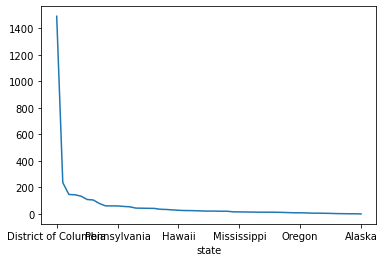

In [151]:
data2010['density'].plot()

In [149]:
data2010

,ages,year,population,abbreviation,area (sq. mi),density
state,,,,,,
District of Columbia,under18,2010,101309.0,DC,68,1489.838235
New Jersey,under18,2010,2062013.0,NJ,8722,236.415157
Connecticut,under18,2010,814187.0,CT,5544,146.859127
Rhode Island,under18,2010,223088.0,RI,1545,144.393528
Massachusetts,under18,2010,1415962.0,MA,10555,134.150829
Maryland,under18,2010,1351983.0,MD,12407,108.969372
Delaware,under18,2010,205478.0,DE,1954,105.157625
New York,under18,2010,4318033.0,NY,54475,79.266324
Florida,under18,2010,3999532.0,FL,65758,60.821984
